# Preparation Works

## Loading font for future use.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Noto_Sans_SC.zip to Noto_Sans_SC.zip


In [2]:
!unzip Noto_Sans_SC.zip

Archive:  Noto_Sans_SC.zip
 extracting: OFL.txt                 
 extracting: README.txt              
 extracting: static/NotoSansSC-ExtraLight.ttf  
 extracting: static/NotoSansSC-Thin.ttf  
 extracting: static/NotoSansSC-Light.ttf  
 extracting: static/NotoSansSC-SemiBold.ttf  
 extracting: static/NotoSansSC-Medium.ttf  
 extracting: static/NotoSansSC-Regular.ttf  
 extracting: static/NotoSansSC-Bold.ttf  
 extracting: static/NotoSansSC-ExtraBold.ttf  
 extracting: static/NotoSansSC-Black.ttf  
 extracting: NotoSansSC-VariableFont_wght.ttf  


In [3]:
font_path = 'NotoSansSC-Regular.ttf'

In [75]:
import nltk
import spacy
from nltk.probability import ConditionalFreqDist, ConditionalProbDist, ELEProbDist
from collections import Counter

# Load spaCy's Chinese language model
# Ensure to download it first using
spacy.cli.download('zh_core_web_sm')
nlp = spacy.load('zh_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('zh_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Preparation for google / visulization

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
from google.colab import drive
import os
import pandas as pd
import gzip
import json

In [6]:
drive.mount('/content/drive',force_remount=True)

# Set the path to your dataset folder
folder_path = '/content/drive/My Drive/PeoplesDaily'

Mounted at /content/drive


In [7]:
for file_name in os.listdir(folder_path):
    if file_name.endswith('.jsonl.gz'):
        file_path = os.path.join(folder_path, file_name)

        # Read the .jsonl.gz file
        with gzip.open(file_path, 'rb') as f:
            # Read each line as a separate JSON object and convert to DataFrame
            df = pd.DataFrame([json.loads(line) for line in f.readlines()])

            # Print out the column names
            print(f"Columns in {file_name}: {df.columns.tolist()}")

Columns in 1985.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1986.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1987.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1988.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1989.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1990.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1992.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1993.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1994.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1995.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1996.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1997.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1998.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 1999.jsonl.gz: ['date', 'title', 'author', 'page', 'text']
Columns in 2000.json

## Open file and save it to df

In [ ]:
combined_df = pd.DataFrame()

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.jsonl.gz'):
        file_path = os.path.join(folder_path, file_name)

        # Read the .jsonl.gz file
        with gzip.open(file_path, 'rb') as f:
            # Read each line as a separate JSON object and select required columns
            df = pd.DataFrame([json.loads(line) for line in f.readlines()])
            df = df[['date', 'title', 'text']]  # Select only the required columns

            # Concatenate this file's DataFrame with the combined DataFrame
            combined_df = pd.concat([combined_df, df], ignore_index=True)


In [ ]:
import pandas as pd
# Ensure the 'date' column is in datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Filter rows where the year is between 1985 and 1995
filtered_df = combined_df[(combined_df['date'].dt.year >= 1985) & (combined_df['date'].dt.year <= 1995)]

# Save the filtered DataFrame to a new variable
new_df = filtered_df

# Preprocessing

## Tokenizing the data

The following code is just to show that how I performed tokenizing. I did not run them in this file, as it takes too long and I have ran them in my coding presentatioin.

In [ ]:
import jieba

# Read the stopwords from the file, including punctuation and symbols
stopwords_path = '/content/drive/My Drive/Colab Notebooks/ChineseStopWords.txt'
with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords = [line.strip() for line in f.readlines()]

# Define a simple preprocessing function
def preprocess_text(text):
    # Tokenize the text
    words = jieba.cut(text)

    # Remove stopwords, including punctuation and symbols
    words = [word for word in words if word not in stopwords]

    # Join the words back into a string
    return " ".join(words)

# Function to preprocess a group of texts
def preprocess_texts_by_year(df):
    year = df['date'].dt.year.iloc[0]  # Assuming the 'date' column is already in datetime format
    print(f"Preprocessing texts for year: {year}")
    df['preprocessed_text'] = df['text'].apply(preprocess_text)
    return df

# Assuming new_df is your DataFrame and the 'date' column is already in datetime format
# Group by year and apply preprocessing
grouped = new_df.groupby(new_df['date'].dt.year)
preprocessed_df = pd.DataFrame()  # Initialize an empty DataFrame to hold preprocessed data

for name, group in grouped:
    preprocessed_group = preprocess_texts_by_year(group)
    preprocessed_df = pd.concat([preprocessed_df, preprocessed_group], ignore_index=True)


In [ ]:
# Function to tokenize Chinese text using jieba
def tokenize_chinese_text(text):
    tokens = jieba.cut(text)
    return list(tokens)

# Tokenizing the 'title' column
preprocessed_df['title_tokens'] = preprocessed_df['title'].astype(str).apply(tokenize_chinese_text)

##EDA

In [8]:
file_path = '/content/drive/My Drive/PreprocessedTexts.csv'

# Reload the DataFrame
preprocessed_df = pd.read_csv(file_path, encoding='utf-8-sig')

# Convert the 'date' column to datetime format
preprocessed_df['date'] = pd.to_datetime(preprocessed_df['date'])
print("DataFrame reloaded successfully.")

DataFrame reloaded successfully.


In [9]:
preprocessed_df.head()

,date,title,text,preprocessed_text
0,1985-01-01,和衷共济搞四化——一九八五年元旦献词,和衷共济搞四化\n ——一九八五年元旦献词\n 岁月之树又增添了一周新的...,和衷共济 搞 四化 \n 一九八五年 元旦 献词 \n ...
1,1985-01-01,一九八五年一月上旬天气展望,一九八五年一月上旬天气展望\n 据新华社北京12月31日电 中央气象台对198...,一九八五年 一月 上旬 天气 展望 \n 新华社 北京 12...
2,1985-01-01,血液换出稀释法可治疗脑血栓,血液换出稀释法可治疗脑血栓\n 山东省济宁市第二人民医院用血液换出稀释法治疗脑...,血液 换 出 稀释 法可 治疗 脑血栓 \n 山东省 济宁市...
3,1985-01-01,玻利维亚紧张局势得到缓和 拒绝交权的前陆军司令奥尔维斯被迫投降,玻利维亚紧张局势得到缓和\n 拒绝交权的前陆军司令奥尔维斯被迫投降\n ...,玻利维亚 紧张局势 得到 缓和 \n 拒绝 交权 前 陆军 ...
4,1985-01-01,北京假肢科研所主体工程奠基,北京假肢科研所主体工程奠基\n 本报讯 民政部北京假肢科研主体工程12月31...,北京 假肢 科研所 主体工程 奠基 \n 本报讯 民...


In [46]:
def calculate_average_article_length(df):
    # Ensure text is treated as a string, handling NaN or None values
    total_length = df['preprocessed_text'].fillna('').apply(lambda x: len(str(x).split())).sum()
    average_length = total_length / len(df) if len(df) > 0 else 0
    return average_length

# Calculate average article length for each period
average_length_period_1 = calculate_average_article_length(df_period_1)
average_length_period_2 = calculate_average_article_length(df_period_2)
average_length_period_3 = calculate_average_article_length(df_period_3)

# Print the average article length for each period
print(f"Average article length from 1985 to 1989.06.01: {average_length_period_1:.2f} words")
print(f"Average article length from 1989.06.01 to 1989.06.30: {average_length_period_2:.2f} words")
print(f"Average article length from 1989.06.30 to 1995.12.31: {average_length_period_3:.2f} words")



Average article length from 1985 to 1989.06.01: 199.35 words
Average article length from 1989.06.01 to 1989.06.30: 223.06 words
Average article length from 1989.06.30 to 1995.12.31: 201.80 words


## a quick look at word frequency

In [10]:
# Define the time periods
period_1_start = pd.Timestamp('1985-01-01')
period_1_end = pd.Timestamp('1989-06-01')
period_2_start = pd.Timestamp('1989-06-01')
period_2_end = pd.Timestamp('1989-06-30')
period_3_start = pd.Timestamp('1989-06-30')
period_3_end = pd.Timestamp('1995-12-31')

# Filter the DataFrame for each period
df_period_1 = preprocessed_df[(preprocessed_df['date'] >= period_1_start) & (preprocessed_df['date'] < period_1_end)]
df_period_2 = preprocessed_df[(preprocessed_df['date'] >= period_2_start) & (preprocessed_df['date'] <= period_2_end)]
df_period_3 = preprocessed_df[(preprocessed_df['date'] > period_3_start) & (preprocessed_df['date'] <= period_3_end)]


In [11]:
excluded_tokens = {
    '月', '中', '说', '年', '日',  # Original tokens
    '1', '2', '3', '4', '5', '6', '7', '8', '9', '0',  # Arabic numerals
    '１', '２', '３', '４', '５', '６', '７', '８', '９', '０'  # Chinese numerals
}

In [13]:
from collections import Counter
def count_word_frequencies(df):
    # Ensure all elements are strings and combine all rows in the 'preprocessed_text' column into one large string
    all_texts = ' '.join(df['preprocessed_text'].astype(str).tolist())
    # Tokenize the string into words
    words = all_texts.split()
    # Filter out the excluded tokens
    filtered_words = [word for word in words if word not in excluded_tokens]
    # Count the frequency of each remaining word
    word_counts = Counter(filtered_words)
    return word_counts

# Count word frequencies for each period, excluding specific tokens
word_frequencies_period_1 = count_word_frequencies(df_period_1)
word_frequencies_period_2 = count_word_frequencies(df_period_2)
word_frequencies_period_3 = count_word_frequencies(df_period_3)

In [14]:
print("Most common words for 1985 to 1989.06.01, excluding specific tokens:")
for word, count in word_frequencies_period_1.most_common(10):
    print(f"{word}: {count}")

print("\nMost common words for 1989.06.01 to 1989.06.30, excluding specific tokens:")
for word, count in word_frequencies_period_2.most_common(10):
    print(f"{word}: {count}")

print("\nMost common words for 1989.06.30 to 1995.12.31, excluding specific tokens:")
for word, count in word_frequencies_period_3.most_common(10):
    print(f"{word}: {count}")

Most common words for 1985 to 1989.06.01, excluding specific tokens:
发展: 118045
中国: 114986
问题: 107104
工作: 103005
经济: 98523
国家: 91542
企业: 80908
进行: 78773
新: 72563
新华社: 70635

Most common words for 1989.06.01 to 1989.06.30, excluding specific tokens:
中国: 1552
暴乱: 1400
人民: 1301
工作: 1251
北京: 1230
反革命: 1141
问题: 1111
部队: 1066
同志: 1005
日电: 998

Most common words for 1989.06.30 to 1995.12.31, excluding specific tokens:
中国: 245154
发展: 219987
经济: 163935
工作: 154005
企业: 142924
问题: 140912
国家: 138422
记者: 111304
建设: 111304
新: 107594


In [78]:
def create_frequency_dataframe(word_counts):
    df_freq = pd.DataFrame(word_counts.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
    return df_freq


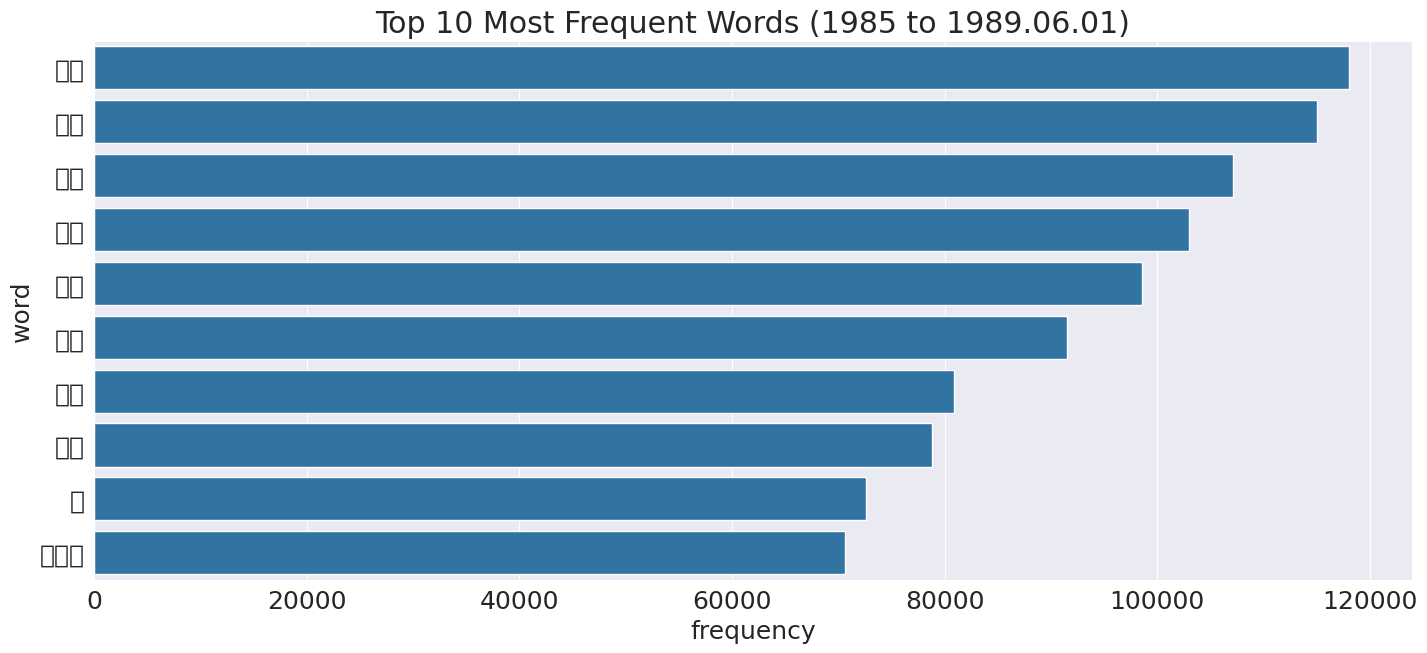

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties


df_freq_period_1 = create_frequency_dataframe(word_frequencies_period_1)
df_freq_period_2 = create_frequency_dataframe(word_frequencies_period_2)
df_freq_period_3 = create_frequency_dataframe(word_frequencies_period_3)


# Set the font globally for Matplotlib
plt.rcParams['font.sans-serif'] = ['Noto Sans SC']
plt.rcParams['axes.unicode_minus'] = False

sns.barplot(x=df_freq_period_1['frequency'][:10], y=df_freq_period_1['word'][:10])
plt.title('Top 10 Most Frequent Words (1985 to 1989.06.01)')
plt.show()


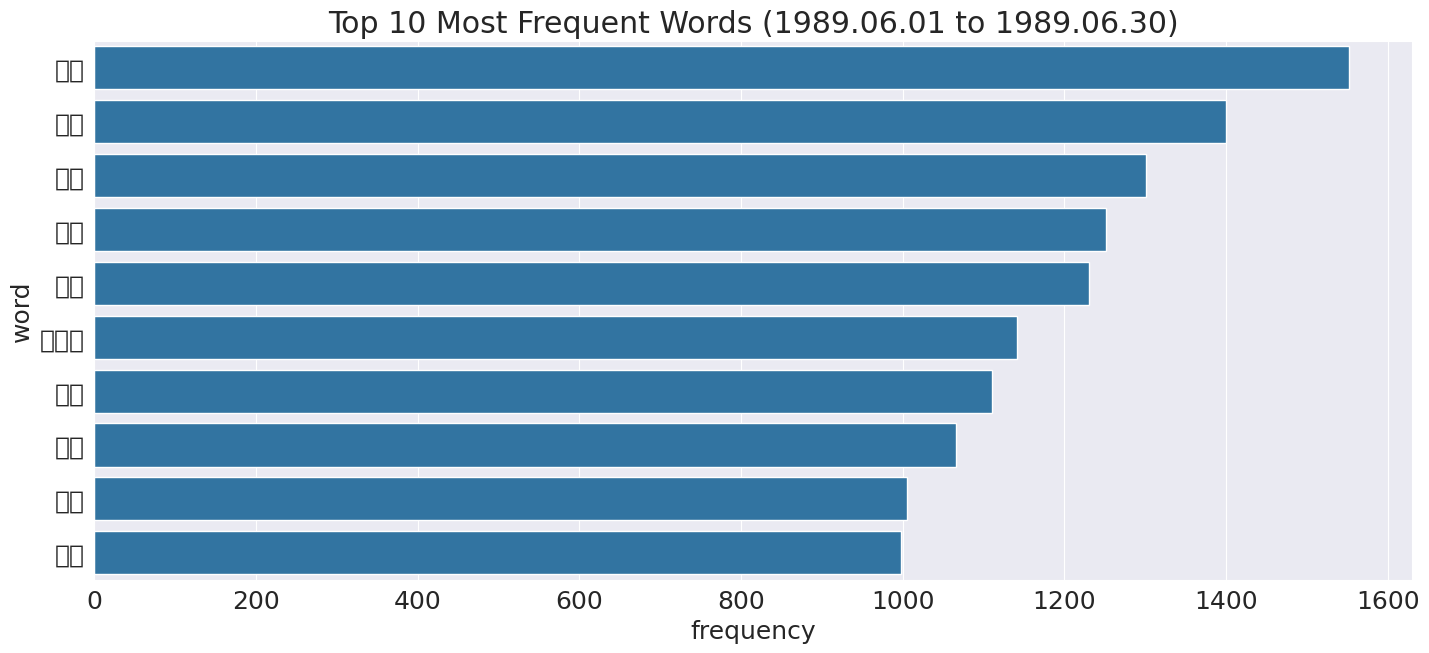

In [81]:
sns.barplot(x=df_freq_period_2['frequency'][:10], y=df_freq_period_2['word'][:10])
plt.title('Top 10 Most Frequent Words (1989.06.01 to 1989.06.30)')
plt.show()

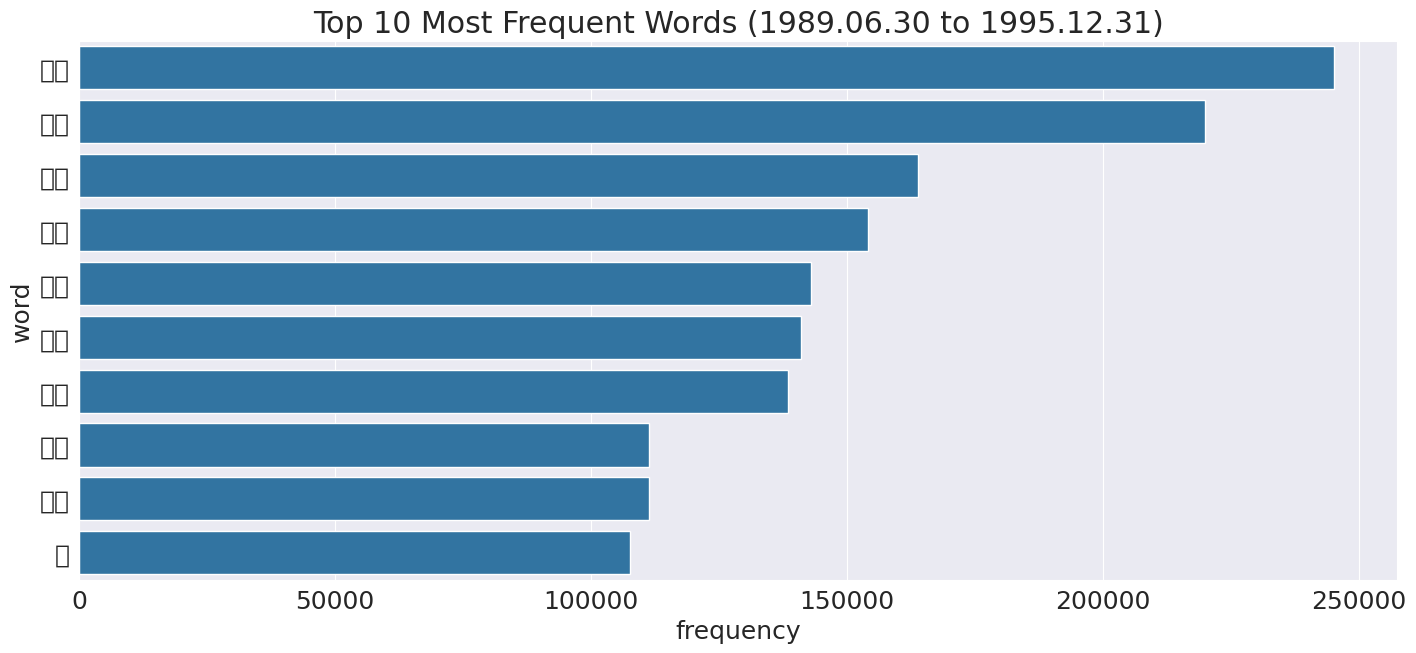

In [82]:
sns.barplot(x=df_freq_period_3['frequency'][:10], y=df_freq_period_3['word'][:10])
plt.title('Top 10 Most Frequent Words (1989.06.30 to 1995.12.31)')
plt.show()

##then word frequency related to neoliberlaism

In [15]:
words_of_interest = {'自由主义', '小康社会', '消费主义', '自由市场', '自由贸易', '金融市场', '自由化', '全球化', '私有化', "经济改革", "市场化"}

In [16]:
def count_occurrences(df, words):
    counts = {word: 0 for word in words}
    for text in df['preprocessed_text'].astype(str).tolist():
        for word in words:
            counts[word] += text.count(word)
    return counts

In [17]:
counts_period_1 = count_occurrences(df_period_1, words_of_interest)
counts_period_2 = count_occurrences(df_period_2, words_of_interest)
counts_period_3 = count_occurrences(df_period_3, words_of_interest)


In [18]:
# Comparing frequencies
print("Word frequencies for 1985 to 1989.06.01:")
for word, count in counts_period_1.items():
    print(f"{word}: {count}")

print("\nWord frequencies for 1989.06.01 to 1989.06.30:")
for word, count in counts_period_2.items():
    print(f"{word}: {count}")

print("\nWord frequencies for 1989.06.30 to 1995.12.31:")
for word, count in counts_period_3.items():
    print(f"{word}: {count}")

Word frequencies for 1985 to 1989.06.01:
自由化: 2068
金融市场: 670
全球化: 20
自由贸易: 380
自由主义: 132
经济改革: 0
自由市场: 132
市场化: 40
小康社会: 11
消费主义: 2
私有化: 347

Word frequencies for 1989.06.01 to 1989.06.30:
自由化: 167
金融市场: 6
全球化: 0
自由贸易: 5
自由主义: 0
经济改革: 0
自由市场: 0
市场化: 0
小康社会: 0
消费主义: 0
私有化: 4

Word frequencies for 1989.06.30 to 1995.12.31:
自由化: 4722
金融市场: 1109
全球化: 172
自由贸易: 1920
自由主义: 133
经济改革: 0
自由市场: 153
市场化: 464
小康社会: 30
消费主义: 12
私有化: 956


In [19]:
print(f"Number of articles from 1985 to 1989.06.01: {len(df_period_1)}")
print(f"Number of articles from 1989.06.01 to 1989.06.30: {len(df_period_2)}")
print(f"Number of articles from 1989.06.30 to 1995.12.31: {len(df_period_3)}")

Number of articles from 1985 to 1989.06.01: 147449
Number of articles from 1989.06.01 to 1989.06.30: 1702
Number of articles from 1989.06.30 to 1995.12.31: 226151


In [20]:
def count_occurrences_normalized(df, words):
    article_count = len(df)
    counts = {word: 0 for word in words}
    for text in df['preprocessed_text'].astype(str).tolist():
        for word in words:
            counts[word] += text.count(word)
    # Normalize counts by the number of articles
    normalized_counts = {word: (count / article_count) for word, count in counts.items()}
    return normalized_counts

In [22]:
counts_period_1_normalized = count_occurrences_normalized(df_period_1, words_of_interest)
counts_period_2_normalized = count_occurrences_normalized(df_period_2, words_of_interest)
counts_period_3_normalized = count_occurrences_normalized(df_period_3, words_of_interest)

In [23]:
print("\nNormalized word frequencies for 1985 to 1989.06.01:")
for word, count in counts_period_1_normalized.items():
    print(f"{word}: {count:.5f}")

print("\nNormalized word frequencies for 1989.06.01 to 1989.06.30:")
for word, count in counts_period_2_normalized.items():
    print(f"{word}: {count:.5f}")

print("\nNormalized word frequencies for 1989.06.30 to 1995.12.31:")
for word, count in counts_period_3_normalized.items():
    print(f"{word}: {count:.5f}")


Normalized word frequencies for 1985 to 1989.06.01:
自由化: 0.01403
金融市场: 0.00454
全球化: 0.00014
自由贸易: 0.00258
自由主义: 0.00090
经济改革: 0.00000
自由市场: 0.00090
市场化: 0.00027
小康社会: 0.00007
消费主义: 0.00001
私有化: 0.00235

Normalized word frequencies for 1989.06.01 to 1989.06.30:
自由化: 0.09812
金融市场: 0.00353
全球化: 0.00000
自由贸易: 0.00294
自由主义: 0.00000
经济改革: 0.00000
自由市场: 0.00000
市场化: 0.00000
小康社会: 0.00000
消费主义: 0.00000
私有化: 0.00235

Normalized word frequencies for 1989.06.30 to 1995.12.31:
自由化: 0.02088
金融市场: 0.00490
全球化: 0.00076
自由贸易: 0.00849
自由主义: 0.00059
经济改革: 0.00000
自由市场: 0.00068
市场化: 0.00205
小康社会: 0.00013
消费主义: 0.00005
私有化: 0.00423


In [26]:
periods = [
    ("1985-01-01", "1989-06-01"),
    ("1989-06-01", "1989-06-30"),
    ("1989-06-30", "1995-12-31")
]

Now we calculate the distribution frequency as by "China"

In [28]:
def find_top_words_associated_with_china(start_date, end_date, excluded_tokens, top_n=10):
    period_df = preprocessed_df[(preprocessed_df['date'] >= pd.Timestamp(start_date)) &
                                (preprocessed_df['date'] <= pd.Timestamp(end_date)) &
                                preprocessed_df['preprocessed_text'].astype(str).str.contains("中国")]

    all_words = [word for text in period_df['preprocessed_text'].dropna() for word in text.split()
                 if word != "中国" and word not in excluded_tokens]
    word_counts = Counter(all_words)

    return word_counts.most_common(top_n)

# Ensure the periods variable is defined correctly as shown above before running the loop
for start, end in periods:
    print(f"Top 10 words associated with '中国' from {start} to {end}, excluding specific tokens:")
    for word, count in find_top_words_associated_with_china(start, end, excluded_tokens):
        print(f"{word}: {count}")
    print("\n")

Top 10 words associated with '中国' from 1985-01-01 to 1989-06-01, excluding specific tokens:
发展: 58530
经济: 43907
问题: 43369
国家: 39463
工作: 37877
我国: 34049
人民: 33149
同志: 31798
进行: 30971
新: 30350


Top 10 words associated with '中国' from 1989-06-01 to 1989-06-30, excluding specific tokens:
暴乱: 1011
人民: 857
反革命: 785
同志: 713
工作: 698
北京: 691
学生: 560
部队: 532
发展: 503
戒严: 499


Top 10 words associated with '中国' from 1989-06-30 to 1995-12-31, excluding specific tokens:
发展: 141280
经济: 91534
国家: 75160
工作: 74982
问题: 72342
建设: 67778
社会主义: 62179
我国: 61059
新: 57828
人民: 57605




Now we compute the frequency.

In [29]:
def find_top_words_associated_with_china_adjusted(start_date, end_date, excluded_tokens, num_articles, top_n=10):
    period_df = preprocessed_df[(preprocessed_df['date'] >= pd.Timestamp(start_date)) &
                                (preprocessed_df['date'] <= pd.Timestamp(end_date)) &
                                preprocessed_df['preprocessed_text'].astype(str).str.contains("中国")]

    all_words = [word for text in period_df['preprocessed_text'].dropna() for word in text.split()
                 if word != "中国" and word not in excluded_tokens]
    word_counts = Counter(all_words)

    # Adjusting counts by the number of articles
    adjusted_counts = {word: (count / num_articles) for word, count in word_counts.most_common(top_n)}
    return adjusted_counts

In [30]:
for (start, end), df_period in zip(periods, [df_period_1, df_period_2, df_period_3]):
    num_articles = len(df_period)
    print(f"Adjusted top words associated with '中国' from {start} to {end}, per article:")
    adjusted_counts = find_top_words_associated_with_china_adjusted(start, end, excluded_tokens, num_articles)
    for word, adjusted_count in adjusted_counts.items():
        print(f"{word}: {adjusted_count:.4f}")
    print("\n")

Adjusted top words associated with '中国' from 1985-01-01 to 1989-06-01, per article:
发展: 0.3970
经济: 0.2978
问题: 0.2941
国家: 0.2676
工作: 0.2569
我国: 0.2309
人民: 0.2248
同志: 0.2157
进行: 0.2100
新: 0.2058


Adjusted top words associated with '中国' from 1989-06-01 to 1989-06-30, per article:
暴乱: 0.5940
人民: 0.5035
反革命: 0.4612
同志: 0.4189
工作: 0.4101
北京: 0.4060
学生: 0.3290
部队: 0.3126
发展: 0.2955
戒严: 0.2932


Adjusted top words associated with '中国' from 1989-06-30 to 1995-12-31, per article:
发展: 0.6247
经济: 0.4047
国家: 0.3323
工作: 0.3316
问题: 0.3199
建设: 0.2997
社会主义: 0.2749
我国: 0.2700
新: 0.2557
人民: 0.2547




In [31]:
# Adjusted function to find top words associated with "发展", adjusting for excluded tokens
def find_top_words_associated_with_development_adjusted(start_date, end_date, excluded_tokens, num_articles, top_n=10):
    period_df = preprocessed_df[(preprocessed_df['date'] >= pd.Timestamp(start_date)) &
                                (preprocessed_df['date'] <= pd.Timestamp(end_date)) &
                                preprocessed_df['preprocessed_text'].astype(str).str.contains("发展")]

    all_words = [word for text in period_df['preprocessed_text'].dropna() for word in text.split()
                 if word != "发展" and word not in excluded_tokens]
    word_counts = Counter(all_words)

    # Adjusting counts by the number of articles
    adjusted_counts = {word: (count / num_articles) for word, count in word_counts.most_common(top_n)}
    return adjusted_counts

# Calculate and print adjusted top 10 words for each period, related to "发展"
for (start, end), df_period in zip(periods, [df_period_1, df_period_2, df_period_3]):
    num_articles = len(df_period)
    print(f"Adjusted top words associated with '发展' (development) from {start} to {end}, per article:")
    adjusted_counts = find_top_words_associated_with_development_adjusted(start, end, excluded_tokens, num_articles)
    for word, adjusted_count in adjusted_counts.items():
        print(f"{word}: {adjusted_count:.4f}")
    print("\n")


Adjusted top words associated with '发展' (development) from 1985-01-01 to 1989-06-01, per article:
经济: 0.5350
中国: 0.4300
问题: 0.4124
企业: 0.3760
工作: 0.3706
国家: 0.3661
改革: 0.3365
新: 0.2916
生产: 0.2760
我国: 0.2611


Adjusted top words associated with '发展' (development) from 1989-06-01 to 1989-06-30, per article:
中国: 0.5476
暴乱: 0.5288
工作: 0.4612
人民: 0.4600
反革命: 0.4101
经济: 0.3731
同志: 0.3613
问题: 0.3461
国家: 0.3126
学生: 0.3002


Adjusted top words associated with '发展' (development) from 1989-06-30 to 1995-12-31, per article:
中国: 0.6868
经济: 0.6057
企业: 0.4505
工作: 0.4186
国家: 0.3924
问题: 0.3907
建设: 0.3801
新: 0.3040
社会主义: 0.2925
我国: 0.2913




In [32]:
# Adjusted function to find top words associated with "自由化", adjusting for excluded tokens
def find_top_words_associated_with_development_adjusted(start_date, end_date, excluded_tokens, num_articles, top_n=10):
    period_df = preprocessed_df[(preprocessed_df['date'] >= pd.Timestamp(start_date)) &
                                (preprocessed_df['date'] <= pd.Timestamp(end_date)) &
                                preprocessed_df['preprocessed_text'].astype(str).str.contains("自由化")]

    all_words = [word for text in period_df['preprocessed_text'].dropna() for word in text.split()
                 if word != "自由化" and word not in excluded_tokens]
    word_counts = Counter(all_words)

    # Adjusting counts by the number of articles
    adjusted_counts = {word: (count / num_articles) for word, count in word_counts.most_common(top_n)}
    return adjusted_counts

# Calculate and print adjusted top 10 words for each period, related to "自由化"
for (start, end), df_period in zip(periods, [df_period_1, df_period_2, df_period_3]):
    num_articles = len(df_period)
    print(f"Adjusted top words associated with '自由化' (neoliberalization) from {start} to {end}, per article:")
    adjusted_counts = find_top_words_associated_with_development_adjusted(start, end, excluded_tokens, num_articles)
    for word, adjusted_count in adjusted_counts.items():
        print(f"{word}: {adjusted_count:.4f}")
    print("\n")

Adjusted top words associated with '自由化' (neoliberalization) from 1985-01-01 to 1989-06-01, per article:
社会主义: 0.0275
改革: 0.0236
发展: 0.0225
问题: 0.0208
工作: 0.0203
建设: 0.0199
经济: 0.0193
中国: 0.0149
党: 0.0142
坚持: 0.0140


Adjusted top words associated with '自由化' (neoliberalization) from 1989-06-01 to 1989-06-30, per article:
同志: 0.2415
暴乱: 0.2362
党: 0.2045
工作: 0.1839
反革命: 0.1833
学生: 0.1680
坚持: 0.1663
人民: 0.1651
四中全会: 0.1651
社会主义: 0.1492


Adjusted top words associated with '自由化' (neoliberalization) from 1989-06-30 to 1995-12-31, per article:
社会主义: 0.0748
发展: 0.0504
中国: 0.0451
建设: 0.0431
工作: 0.0412
经济: 0.0367
问题: 0.0359
人民: 0.0333
党: 0.0326
同志: 0.0325




In [33]:
# Adjusted function to find top words associated with "私有化", adjusting for excluded tokens
def find_top_words_associated_with_development_adjusted(start_date, end_date, excluded_tokens, num_articles, top_n=10):
    period_df = preprocessed_df[(preprocessed_df['date'] >= pd.Timestamp(start_date)) &
                                (preprocessed_df['date'] <= pd.Timestamp(end_date)) &
                                preprocessed_df['preprocessed_text'].astype(str).str.contains("私有化")]

    all_words = [word for text in period_df['preprocessed_text'].dropna() for word in text.split()
                 if word != "私有化" and word not in excluded_tokens]
    word_counts = Counter(all_words)

    # Adjusting counts by the number of articles
    adjusted_counts = {word: (count / num_articles) for word, count in word_counts.most_common(top_n)}
    return adjusted_counts

# Calculate and print adjusted top 10 words for each period, related to "自由化"
for (start, end), df_period in zip(periods, [df_period_1, df_period_2, df_period_3]):
    num_articles = len(df_period)
    print(f"Adjusted top words associated with '私有化' (privatization) from {start} to {end}, per article:")
    adjusted_counts = find_top_words_associated_with_development_adjusted(start, end, excluded_tokens, num_articles)
    for word, adjusted_count in adjusted_counts.items():
        print(f"{word}: {adjusted_count:.4f}")
    print("\n")

Adjusted top words associated with '私有化' (privatization) from 1985-01-01 to 1989-06-01, per article:
经济: 0.0061
发展: 0.0039
企业: 0.0035
改革: 0.0031
政府: 0.0031
问题: 0.0029
国家: 0.0026
社会主义: 0.0017
英国: 0.0017
社会: 0.0016


Adjusted top words associated with '私有化' (privatization) from 1989-06-01 to 1989-06-30, per article:
刘晓波: 0.0182
经济: 0.0129
中国: 0.0129
改革: 0.0118
学潮: 0.0118
尼日利亚: 0.0112
国民党: 0.0100
计划: 0.0082
政府: 0.0071
达: 0.0065


Adjusted top words associated with '私有化' (privatization) from 1989-06-30 to 1995-12-31, per article:
经济: 0.0165
社会主义: 0.0139
发展: 0.0112
国家: 0.0083
企业: 0.0081
中国: 0.0077
改革: 0.0072
问题: 0.0069
社会: 0.0061
政府: 0.0054




In [73]:
# Adjusted function to find top words associated with "自由市场", adjusting for excluded tokens
def find_top_words_associated_with_development_adjusted(start_date, end_date, excluded_tokens, num_articles, top_n=10):
    period_df = preprocessed_df[(preprocessed_df['date'] >= pd.Timestamp(start_date)) &
                                (preprocessed_df['date'] <= pd.Timestamp(end_date)) &
                                preprocessed_df['preprocessed_text'].astype(str).str.contains("自由市场")]

    all_words = [word for text in period_df['preprocessed_text'].dropna() for word in text.split()
                 if word != "自由市场" and word not in excluded_tokens]
    word_counts = Counter(all_words)

    # Adjusting counts by the number of articles
    adjusted_counts = {word: (count / num_articles) for word, count in word_counts.most_common(top_n)}
    return adjusted_counts

# Calculate and print adjusted top 10 words for each period, related to "自由市场"
for (start, end), df_period in zip(periods, [df_period_1, df_period_2, df_period_3]):
    num_articles = len(df_period)
    print(f"Adjusted top words associated with '自由市场' (free market) from {start} to {end}, per article:")
    adjusted_counts = find_top_words_associated_with_development_adjusted(start, end, excluded_tokens, num_articles)
    for word, adjusted_count in adjusted_counts.items():
        print(f"{word}: {adjusted_count:.4f}")
    print("\n")

Adjusted top words associated with '自由市场' (free market) from 1985-01-01 to 1989-06-01, per article:
经济: 0.0038
市场: 0.0026
问题: 0.0024
发展: 0.0024
国家: 0.0023
改革: 0.0018
生产: 0.0016
中国: 0.0016
同志: 0.0014
社会主义: 0.0013


Adjusted top words associated with '自由市场' (free market) from 1989-06-01 to 1989-06-30, per article:


Adjusted top words associated with '自由市场' (free market) from 1989-06-30 to 1995-12-31, per article:
经济: 0.0044
中国: 0.0028
发展: 0.0022
社会主义: 0.0022
问题: 0.0019
国家: 0.0018
同志: 0.0017
市场: 0.0017
建设: 0.0014
计划: 0.0013




/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23637 (\N{CJK UNIFIED IDEOGRAPH-5C55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


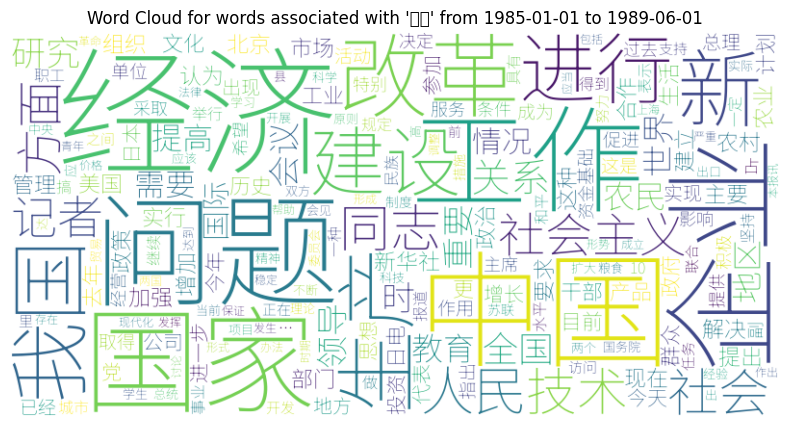

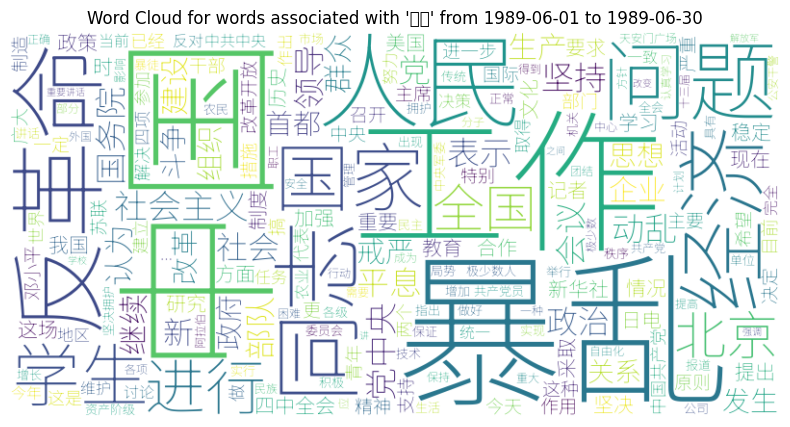

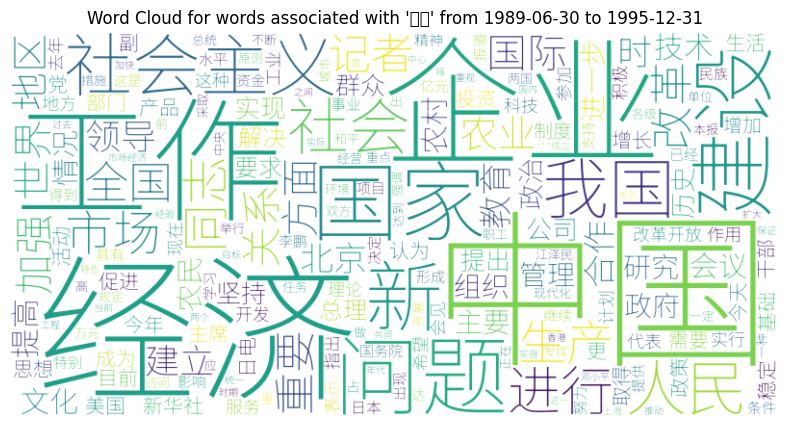

In [42]:
def find_words_associated_with_development(start_date, end_date, excluded_tokens, top_n=200):
    period_df = preprocessed_df[(preprocessed_df['date'] >= pd.Timestamp(start_date)) &
                                (preprocessed_df['date'] <= pd.Timestamp(end_date)) &
                                preprocessed_df['preprocessed_text'].astype(str).str.contains("发展")]

    all_words = [word for text in period_df['preprocessed_text'].dropna() for word in text.split()
                 if word != "发展" and word not in excluded_tokens]
    word_counts = Counter(all_words)

    return dict(word_counts.most_common(top_n))

def generate_word_cloud_for_development(start_date, end_date, excluded_tokens, title):
    word_counts = find_words_associated_with_development(start_date, end_date, excluded_tokens)

    font_path = 'NotoSansSC-VariableFont_wght.ttf'

    wc = WordCloud(width=800, height=400, background_color='white', max_words=200,
                   font_path=font_path, collocations=False)

    wordcloud = wc.generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for each period focusing on "发展"
for start, end in periods:
    title = f"Word Cloud for words associated with '发展' from {start} to {end}"
    generate_word_cloud_for_development(start, end, excluded_tokens, title)



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31169 (\N{CJK UNIFIED IDEOGRAPH-79C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


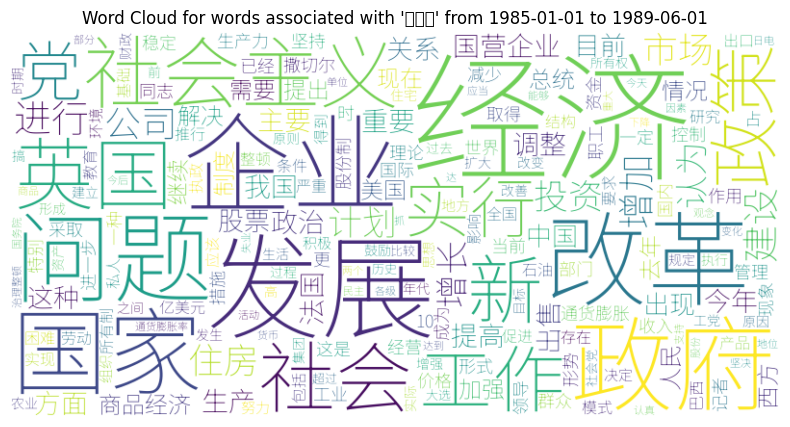

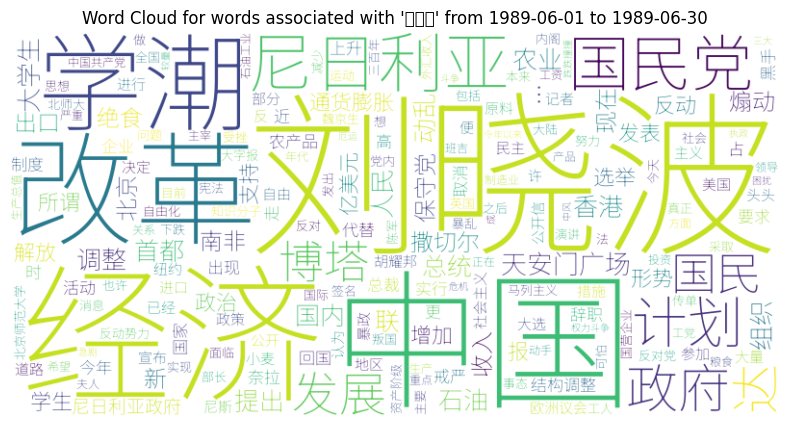

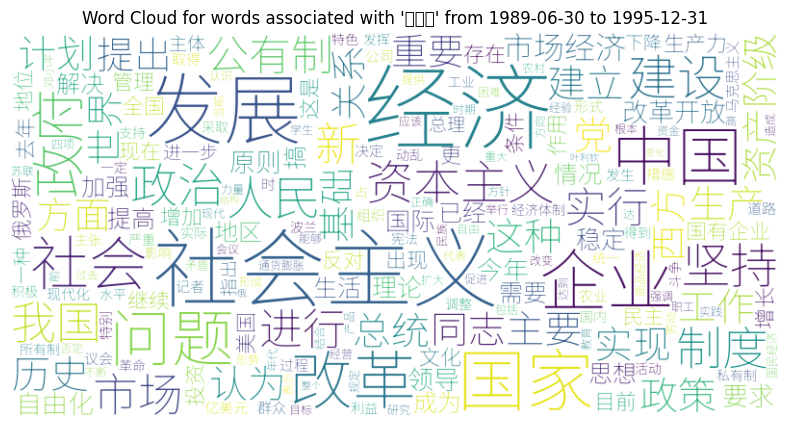

In [43]:
def find_words_associated_with_development(start_date, end_date, excluded_tokens, top_n=200):
    period_df = preprocessed_df[(preprocessed_df['date'] >= pd.Timestamp(start_date)) &
                                (preprocessed_df['date'] <= pd.Timestamp(end_date)) &
                                preprocessed_df['preprocessed_text'].astype(str).str.contains("私有化")]

    all_words = [word for text in period_df['preprocessed_text'].dropna() for word in text.split()
                 if word != "私有化" and word not in excluded_tokens]
    word_counts = Counter(all_words)

    return dict(word_counts.most_common(top_n))

def generate_word_cloud_for_development(start_date, end_date, excluded_tokens, title):
    word_counts = find_words_associated_with_development(start_date, end_date, excluded_tokens)

    font_path = 'NotoSansSC-VariableFont_wght.ttf'

    wc = WordCloud(width=800, height=400, background_color='white', max_words=200,
                   font_path=font_path, collocations=False)

    wordcloud = wc.generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for each period focusing on "私有化"
for start, end in periods:
    title = f"Word Cloud for words associated with '私有化' from {start} to {end}"
    generate_word_cloud_for_development(start, end, excluded_tokens, title)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30001 (\N{CJK UNIFIED IDEOGRAPH-7531}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


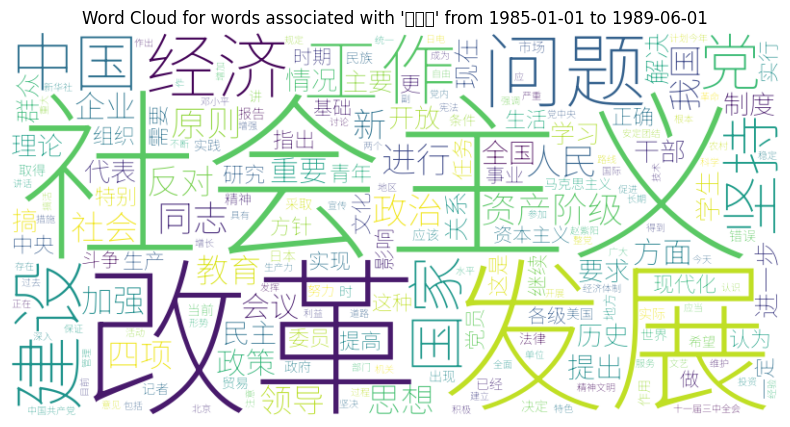

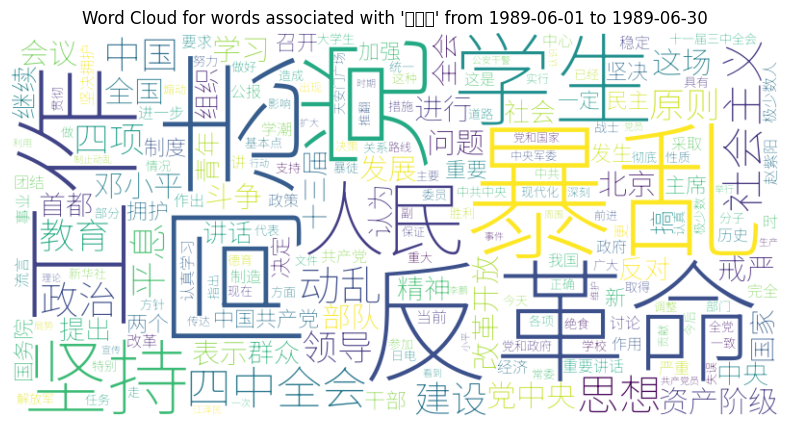

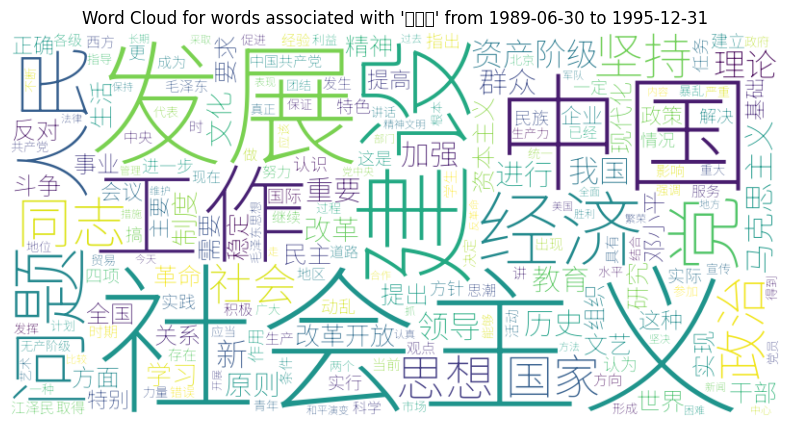

In [44]:
def find_words_associated_with_development(start_date, end_date, excluded_tokens, top_n=200):
    period_df = preprocessed_df[(preprocessed_df['date'] >= pd.Timestamp(start_date)) &
                                (preprocessed_df['date'] <= pd.Timestamp(end_date)) &
                                preprocessed_df['preprocessed_text'].astype(str).str.contains("自由化")]

    all_words = [word for text in period_df['preprocessed_text'].dropna() for word in text.split()
                 if word != "自由化" and word not in excluded_tokens]
    word_counts = Counter(all_words)

    return dict(word_counts.most_common(top_n))

def generate_word_cloud_for_development(start_date, end_date, excluded_tokens, title):
    word_counts = find_words_associated_with_development(start_date, end_date, excluded_tokens)

    font_path = 'NotoSansSC-VariableFont_wght.ttf'

    wc = WordCloud(width=800, height=400, background_color='white', max_words=200,
                   font_path=font_path, collocations=False)

    wordcloud = wc.generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for each period focusing on "自由化"
for start, end in periods:
    title = f"Word Cloud for words associated with '自由化' from {start} to {end}"
    generate_word_cloud_for_development(start, end, excluded_tokens, title)

##line charts

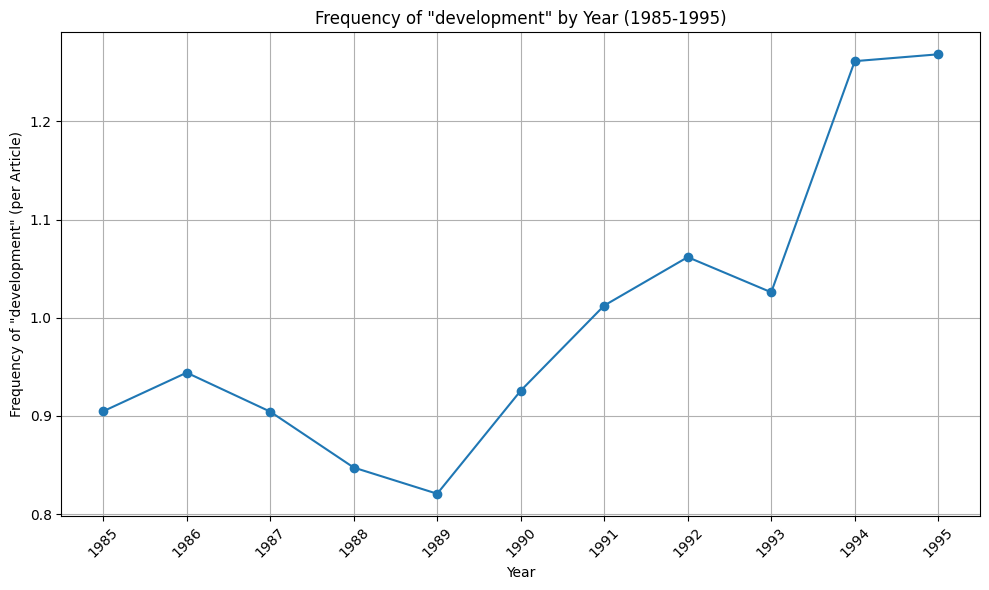

In [67]:
df_grouped = df_filtered.groupby('year').agg({
    'preprocessed_text': lambda texts: sum(str(text).count("发展") for text in texts),
    'title': 'count'  # Assuming each row represents an article; adjust if necessary
}).rename(columns={'preprocessed_text': 'occurrences', 'title': 'articles'})

# Calculate frequency of "发展" per year
df_grouped['frequency'] = df_grouped['occurrences'] / df_grouped['articles']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['frequency'], marker='o', linestyle='-')
plt.title('Frequency of "development" by Year (1985-1995)')
plt.xlabel('Year')
plt.ylabel('Frequency of "development" (per Article)')
plt.grid(True)
plt.xticks(df_grouped.index, rotation=45)  # Ensure all years are shown as ticks
plt.tight_layout()
plt.show()



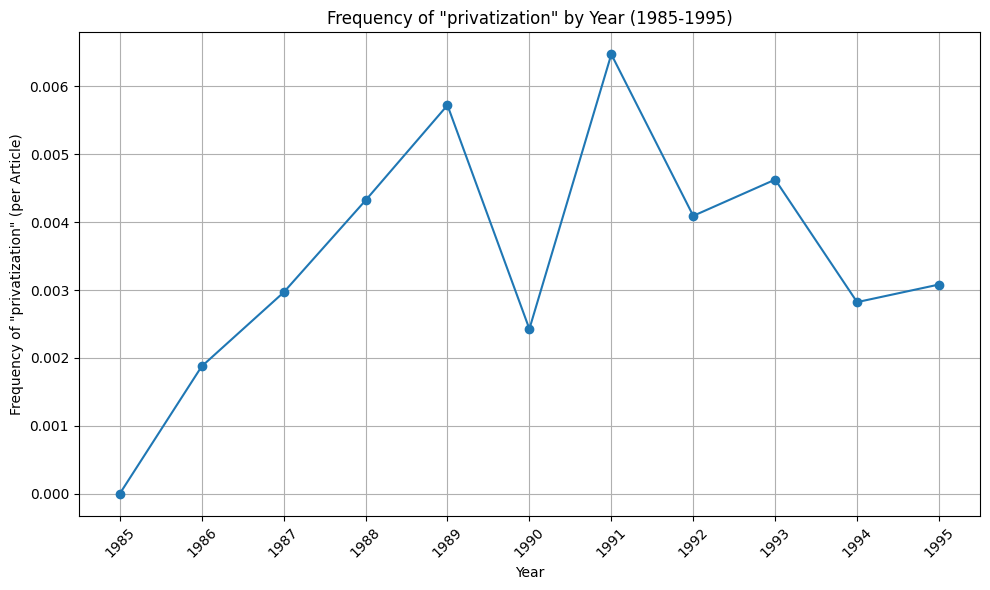

In [68]:
df_grouped = df_filtered.groupby('year').agg({
    'preprocessed_text': lambda texts: sum(str(text).count("私有化") for text in texts),
    'title': 'count'  # Assuming each row represents an article; adjust if necessary
}).rename(columns={'preprocessed_text': 'occurrences', 'title': 'articles'})

# Calculate frequency of "私有化" per year
df_grouped['frequency'] = df_grouped['occurrences'] / df_grouped['articles']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['frequency'], marker='o', linestyle='-')
plt.title('Frequency of "privatization" by Year (1985-1995)')
plt.xlabel('Year')
plt.ylabel('Frequency of "privatization" (per Article)')
plt.grid(True)
plt.xticks(df_grouped.index, rotation=45)  # Ensure all years are shown as ticks
plt.tight_layout()
plt.show()

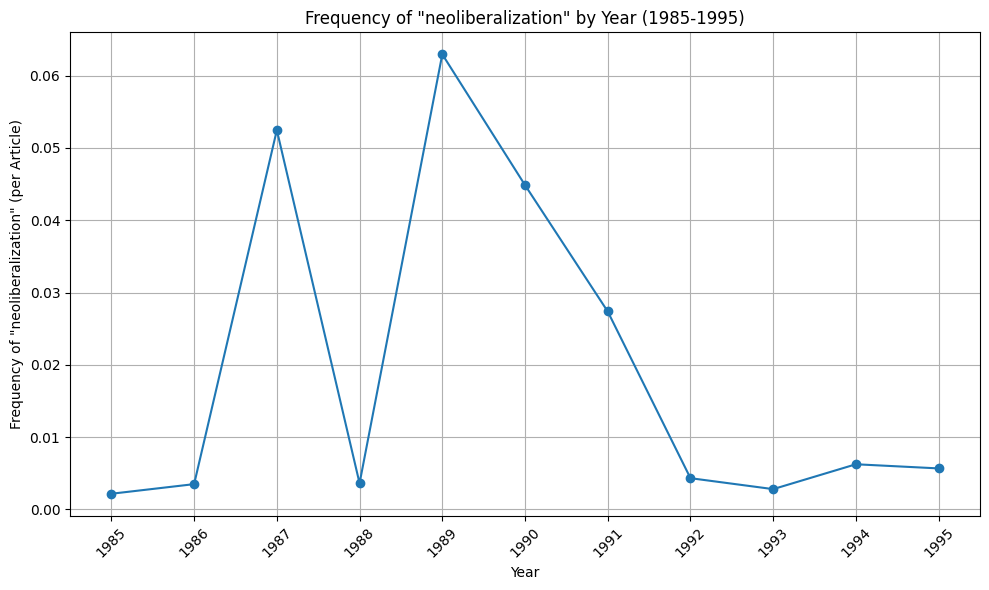

In [69]:
df_grouped = df_filtered.groupby('year').agg({
    'preprocessed_text': lambda texts: sum(str(text).count("自由化") for text in texts),
    'title': 'count'  # Assuming each row represents an article; adjust if necessary
}).rename(columns={'preprocessed_text': 'occurrences', 'title': 'articles'})

# Calculate frequency of "自由化" per year
df_grouped['frequency'] = df_grouped['occurrences'] / df_grouped['articles']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['frequency'], marker='o', linestyle='-')
plt.title('Frequency of "neoliberalization" by Year (1985-1995)')
plt.xlabel('Year')
plt.ylabel('Frequency of "neoliberalization" (per Article)')
plt.grid(True)
plt.xticks(df_grouped.index, rotation=45)  # Ensure all years are shown as ticks
plt.tight_layout()
plt.show()

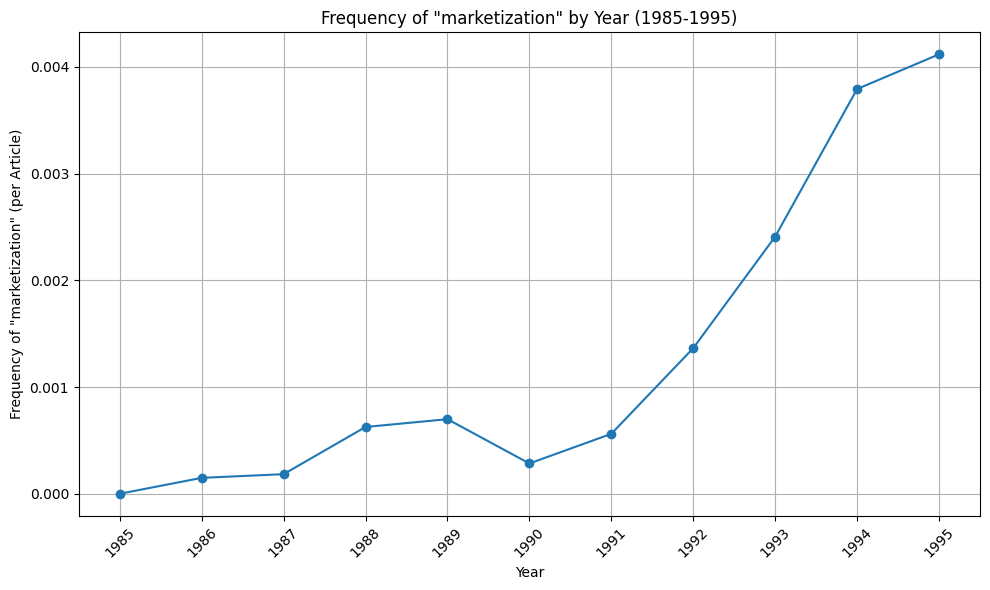

In [70]:
df_grouped = df_filtered.groupby('year').agg({
    'preprocessed_text': lambda texts: sum(str(text).count("市场化") for text in texts),
    'title': 'count'  # Assuming each row represents an article; adjust if necessary
}).rename(columns={'preprocessed_text': 'occurrences', 'title': 'articles'})

# Calculate frequency of "市场化" per year
df_grouped['frequency'] = df_grouped['occurrences'] / df_grouped['articles']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['frequency'], marker='o', linestyle='-')
plt.title('Frequency of "marketization" by Year (1985-1995)')
plt.xlabel('Year')
plt.ylabel('Frequency of "marketization" (per Article)')
plt.grid(True)
plt.xticks(df_grouped.index, rotation=45)  # Ensure all years are shown as ticks
plt.tight_layout()
plt.show()

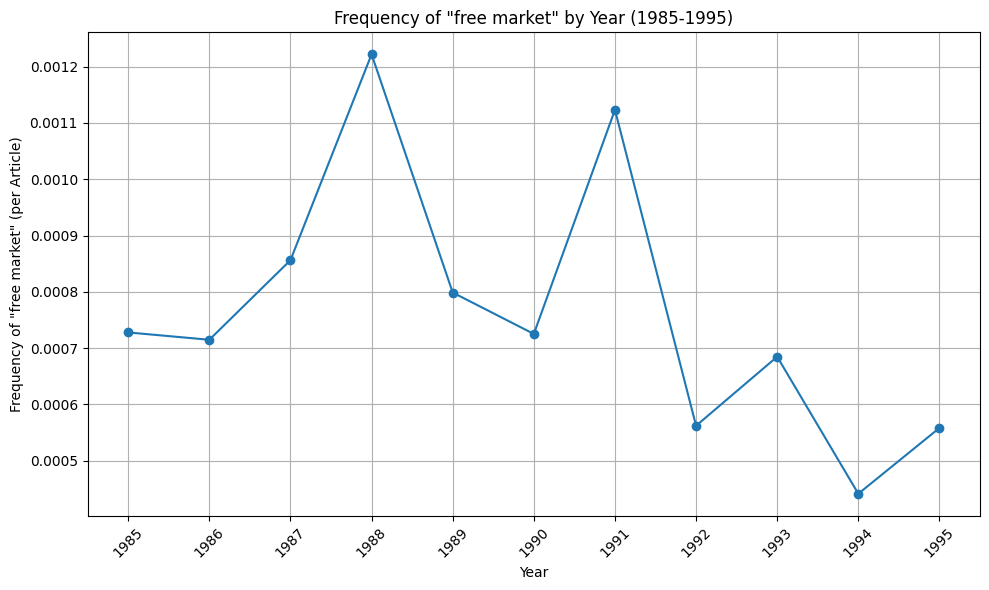

In [71]:
df_grouped = df_filtered.groupby('year').agg({
    'preprocessed_text': lambda texts: sum(str(text).count("自由市场") for text in texts),
    'title': 'count'  # Assuming each row represents an article; adjust if necessary
}).rename(columns={'preprocessed_text': 'occurrences', 'title': 'articles'})

# Calculate frequency of "自由市场" per year
df_grouped['frequency'] = df_grouped['occurrences'] / df_grouped['articles']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['frequency'], marker='o', linestyle='-')
plt.title('Frequency of "free market" by Year (1985-1995)')
plt.xlabel('Year')
plt.ylabel('Frequency of "free market" (per Article)')
plt.grid(True)
plt.xticks(df_grouped.index, rotation=45)  # Ensure all years are shown as ticks
plt.tight_layout()
plt.show()

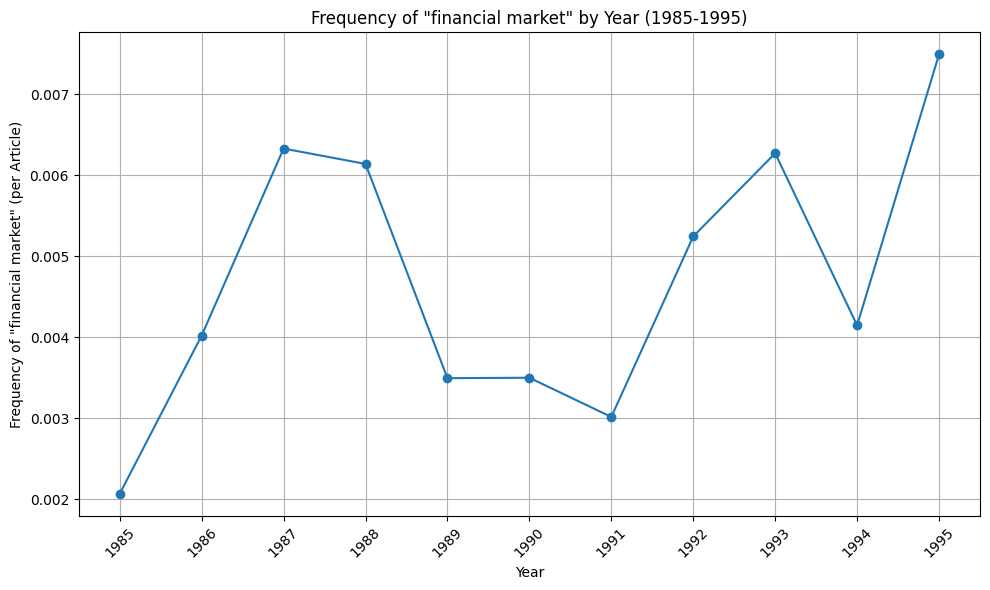

In [72]:
df_grouped = df_filtered.groupby('year').agg({
    'preprocessed_text': lambda texts: sum(str(text).count("金融市场") for text in texts),
    'title': 'count'  # Assuming each row represents an article; adjust if necessary
}).rename(columns={'preprocessed_text': 'occurrences', 'title': 'articles'})

# Calculate frequency of "金融市场" per year
df_grouped['frequency'] = df_grouped['occurrences'] / df_grouped['articles']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['frequency'], marker='o', linestyle='-')
plt.title('Frequency of "financial market" by Year (1985-1995)')
plt.xlabel('Year')
plt.ylabel('Frequency of "financial market" (per Article)')
plt.grid(True)
plt.xticks(df_grouped.index, rotation=45)  # Ensure all years are shown as ticks
plt.tight_layout()
plt.show()